In [1]:
import sys
sys.path.append("..")
import numpy as np
from IPython.display import display, Image
import drawsvg
from utils import load_json, pretty_print_json, draw_task, output_drawing, analyze_task
from copy import deepcopy
data_path = '../arc-prize-2024/'
figs_path = 'figs/'

training_challenges  = load_json(data_path + 'data/arc-agi_training_challenges.json')
training_solutions  = load_json(data_path + 'data/arc-agi_training_solutions.json')
task_ids  = load_json(data_path + 'data/task_ids.json')

Task Index: 0

In [ ]:
index = 0
id = task_ids[f'{index}']

train_task = deepcopy(training_challenges[id])

pretty_print_json(train_task)

display(Image(filename=f'{data_path}figs/train/original/train_task_{index}.png')) 

In [ ]:
from blocks import enlarge, array_and

for item in train_task['train']:
    main_array = item['input']
    enlarged_array = enlarge(main_array, len(main_array))
    item['result'] = array_and(main_array, enlarged_array, len(main_array), len(main_array))
    
for item in train_task['test']:
    main_array = item['input']
    enlarged_array = enlarge(main_array, len(main_array))
    item['output'] = training_solutions[id][0]
    item["result"] = array_and(main_array, enlarged_array, len(main_array), len(main_array))


In [ ]:
drawing = draw_task(train_task, index, id, include_test=True)
output_drawing(drawing, f'{figs_path}solution_{index}_{id}.png')

display(Image(filename=f'{figs_path}solution_{index}_{id}.png')) 

In [ ]:
analyze_task(train_task)

Task Index: 1

In [3]:
index = 1
id = task_ids[f'{index}']

train_task = deepcopy(training_challenges[id])

# pretty_print_json(train_task)

# display(Image(filename=f'{data_path}figs/train/original/train_task_{index}.png')) 

In [4]:
from blocks import find_loops, change_elements_color

x = 3  # Value representing the loop
y = 4  # New value to change the loop cells to

for item in train_task['train']:
    main_array = deepcopy(item['input'])
    loops = find_loops(main_array)
    all_elements = []
    for loop in loops:
        all_elements.extend(loop['interior'])
    item['result'] = change_elements_color(main_array, all_elements, y)
    
for item in train_task['test']:
    main_array =  deepcopy(item['input'])
    loops = find_loops(main_array)
    all_elements = []
    for loop in loops:
        all_elements.extend(loop['interior'])
    item['output'] = training_solutions[id][0]
    item['result'] = change_elements_color(main_array, all_elements, y)

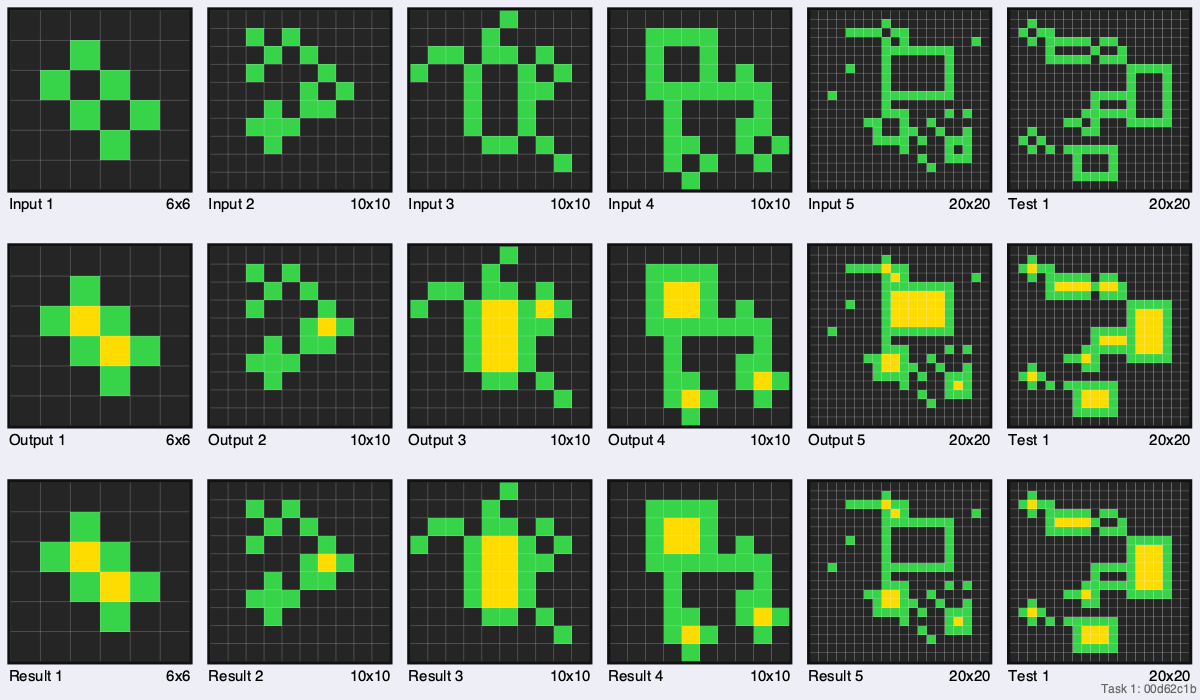

In [5]:
drawing = draw_task(train_task, index, id, include_test=True)
output_drawing(drawing, f'{figs_path}solution_{index}_{id}.png')

display(Image(filename=f'{figs_path}solution_{index}_{id}.png')) 

In [6]:
analyze_task(train_task)

Train:
- Sample 1: Correct, Similarity Ratio: 100.0%
- Sample 2: Correct, Similarity Ratio: 100.0%
- Sample 3: Wrong, Similarity Ratio: 99.0%
- Sample 4: Correct, Similarity Ratio: 100.0%
- Sample 5: Wrong, Similarity Ratio: 94.0%

Test:
Wrong, Similarity Ratio: 98.75%
